# Classification

# Data Preparation Phase

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
from scipy import stats
from scipy.stats import pearsonr
import difflib  # For fuzzy matching

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from fuzzywuzzy import fuzz, process

from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE



### Data Preprocessing


In [2]:
diab = pd.read_csv("/Desktop/diabetes_dataset.csv")
diab.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [3]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [4]:
# Check for missing values
diab.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

In [5]:
# checking for duplicates
duplicates = diab[diab.duplicated()]
print(f"Number of duplicates: {len(duplicates)}")
duplicates

Number of duplicates: 0


,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms


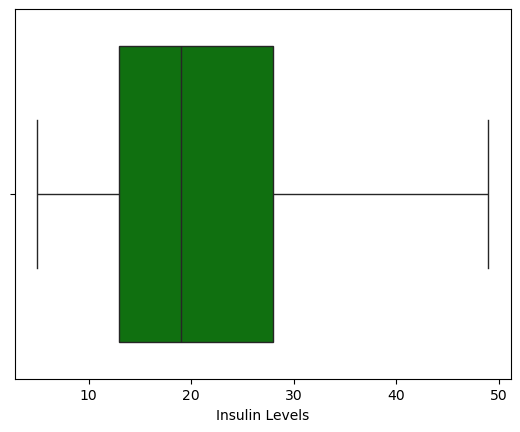

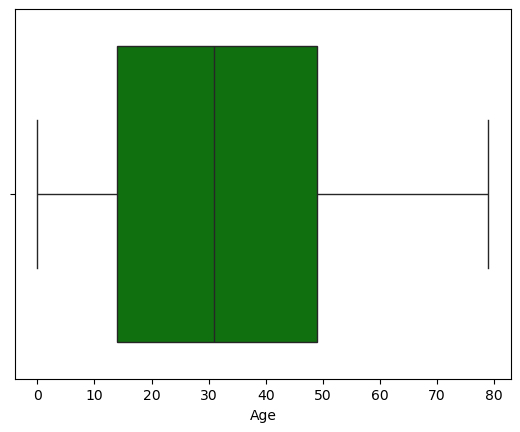

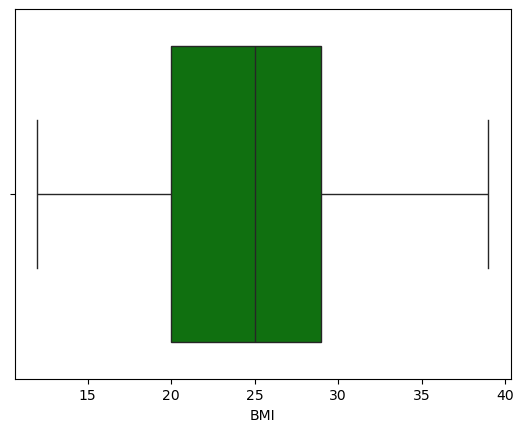

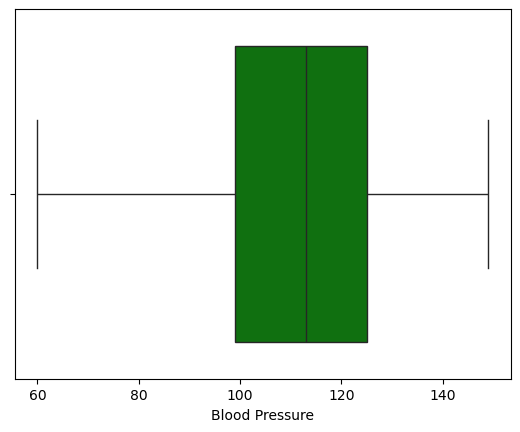

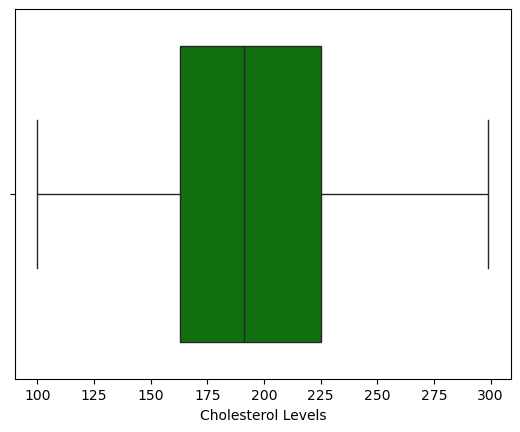

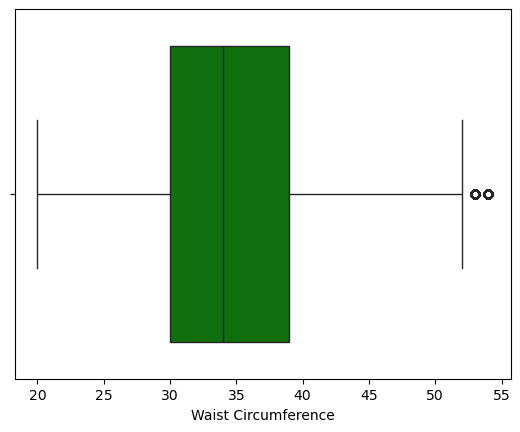

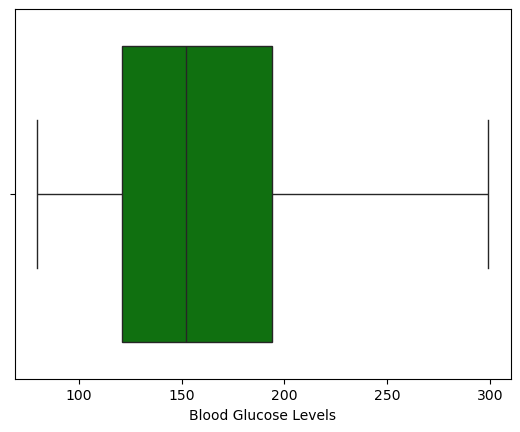

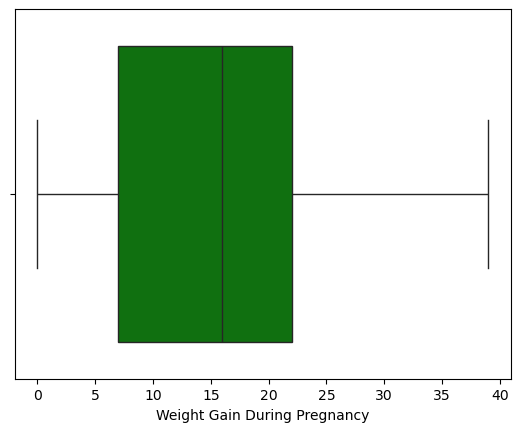

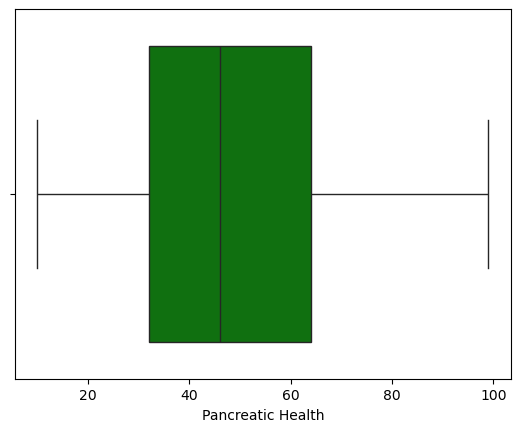

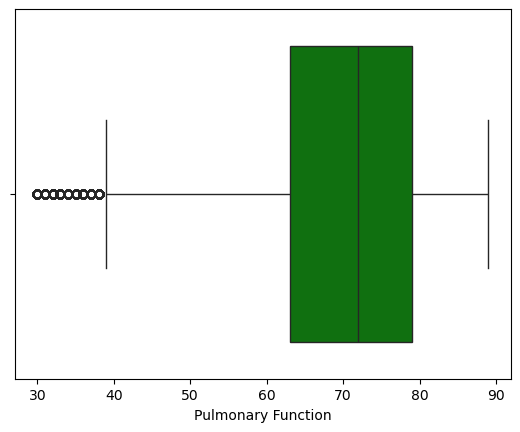

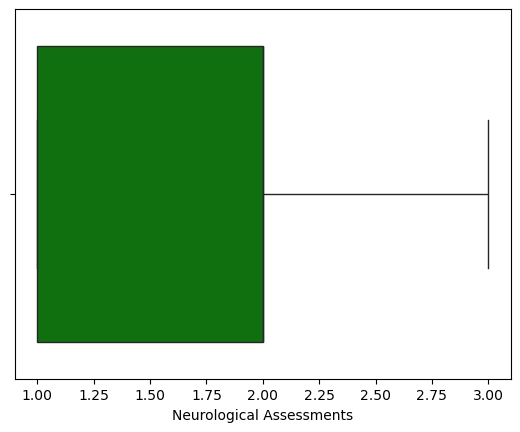

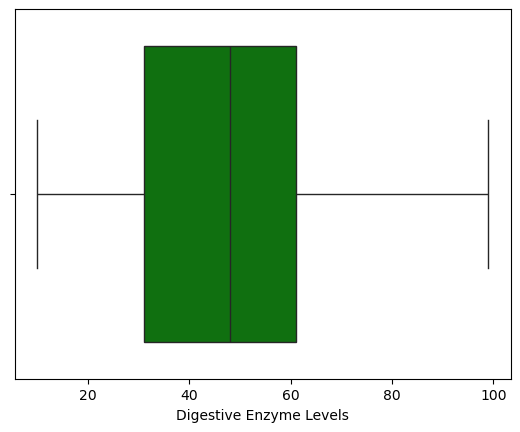

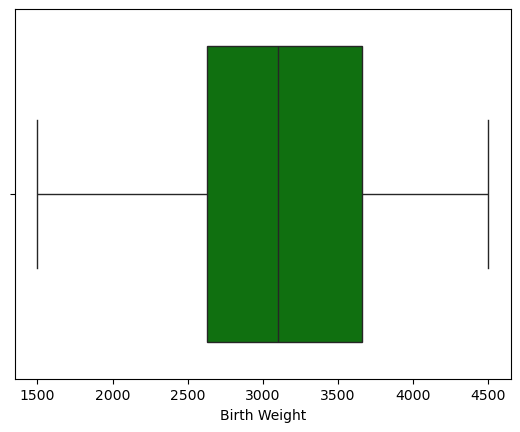

In [6]:
# check for Outliers in the numerical columns 

n_col = diab.select_dtypes(exclude='object').columns
for i in n_col:
    sns.boxplot(diab[i], orient='h', color='green')
    plt.show()

In [27]:
# Outliers detection and Removal

# Defining function to detect and remove outliers
def detect_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold][column]
    return outliers

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    new_cars = df[np.abs(z_scores) < threshold]
    return new_cars

# Detect and print outliers for numeric columns
numeric_columns = diab.select_dtypes(include=['int64', 'float64']).columns

print("Detected Outliers:")
for col in numeric_columns:
    outliers = detect_outliers(diab, col)
    if not outliers.empty:
        print(f"\n{col} outliers:")
        print(outliers)


# Removing Outliers
for col in numeric_columns:
    diab = remove_outliers(diab, col)


Detected Outliers:

Pulmonary Function outliers:
511      35
622      35
853      36
1351     35
1940     36
         ..
68301    36
68597    36
68657    36
68784    35
68897    36
Name: Pulmonary Function, Length: 247, dtype: int64


# Exploratory Data Analysis (EDA)

In [8]:
# Summary Statistics
diab.describe(include='number')

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000,69332.000000
mean,21.676859,32.215384,24.833713,111.503779,195.406090,35.104007,159.839886,15.627344,47.787919,70.633647,1.807131,46.676874,3107.597834
std,10.810818,21.045691,6.013881,19.952055,44.351273,6.809046,47.501095,9.585167,19.931112,11.413584,0.680978,19.298472,708.570296
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,35.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,100.000000,164.000000,30.000000,121.000000,8.000000,32.000000,64.000000,1.000000,32.000000,2641.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,151.000000,16.000000,47.000000,72.000000,2.000000,48.000000,3114.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,193.000000,23.000000,64.000000,79.000000,2.000000,61.000000,3661.000000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [9]:
# Summarize string columns
diab.describe(include='object')

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Ethnicity,Socioeconomic Factors,Smoking Status,...,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms
count,69332,69332,69332,69332,69332,69332,69332,69332,69332,69332,...,69332,69332,69332,69332,69332,69332,69332,69332,69332,69332
unique,13,2,2,2,2,3,2,2,3,2,...,2,2,2,2,2,2,2,2,4,2
top,MODY,Positive,Negative,Yes,Absent,Moderate,Unhealthy,Low Risk,Medium,Smoker,...,Abnormal,No,Yes,Normal,No,No,Positive,Normal,Protein Present,No
freq,5553,34780,34733,34804,34748,23205,34675,34690,23192,34711,...,34946,34746,34702,34945,34787,34819,34975,34691,17456,34718


In [10]:
# Explore unique categories in each categorical variable

categorical_cols = diab.select_dtypes(exclude=["number"]).columns
for col in categorical_cols:
    print(f" **{col}**: {diab[col].nunique()} unique categories") 
    print(diab[col].value_counts(), "\n" + "-"*50)


 **Target**: 13 unique categories
Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Steroid-Induced Diabetes                      5275
LADA                                          5223
Wolfram Syndrome                              4647
Name: count, dtype: int64 
--------------------------------------------------
 **Genetic Markers**: 2 unique categories
Genetic Markers
Positive    34780
Negative    34552
Name: count, dtype: int64 
--------------------------------------------------
 **Autoantibodies**: 2 unique categories
Autoa

In [11]:
# pairwise comparison via crosstab
print("\n Pairwise crosstabs:")
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        print(f"\n{categorical_cols[i]} vs {categorical_cols[j]}:")
        print(pd.crosstab(diab[categorical_cols[i]], diab[categorical_cols[j]]))


 Pairwise crosstabs:

Target vs Genetic Markers:
Genetic Markers                             Negative  Positive
Target                                                        
Cystic Fibrosis-Related Diabetes (CFRD)         2721      2743
Gestational Diabetes                            2686      2658
LADA                                            2629      2594
MODY                                            2763      2790
Neonatal Diabetes Mellitus (NDM)                2733      2675
Prediabetic                                     2666      2710
Secondary Diabetes                              2688      2791
Steroid-Induced Diabetes                        2678      2597
Type 1 Diabetes                                 2705      2741
Type 2 Diabetes                                 2793      2604
Type 3c Diabetes (Pancreatogenic Diabetes)      2533      2787
Wolcott-Rallison Syndrome                       2622      2778
Wolfram Syndrome                                2335      2312

Targ

In [12]:
# Replace 'Secondary Diabetes' with 'Type 2 Diabetes' since they're the same
diab['Target'] = diab['Target'].replace('Secondary Diabetes', 'Type 2 Diabetes')

# Check value counts after merging
print(diab['Target'].value_counts())


Target
Type 2 Diabetes                               10876
MODY                                           5553
Cystic Fibrosis-Related Diabetes (CFRD)        5464
Type 1 Diabetes                                5446
Neonatal Diabetes Mellitus (NDM)               5408
Wolcott-Rallison Syndrome                      5400
Prediabetic                                    5376
Gestational Diabetes                           5344
Type 3c Diabetes (Pancreatogenic Diabetes)     5320
Steroid-Induced Diabetes                       5275
LADA                                           5223
Wolfram Syndrome                               4647
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap')

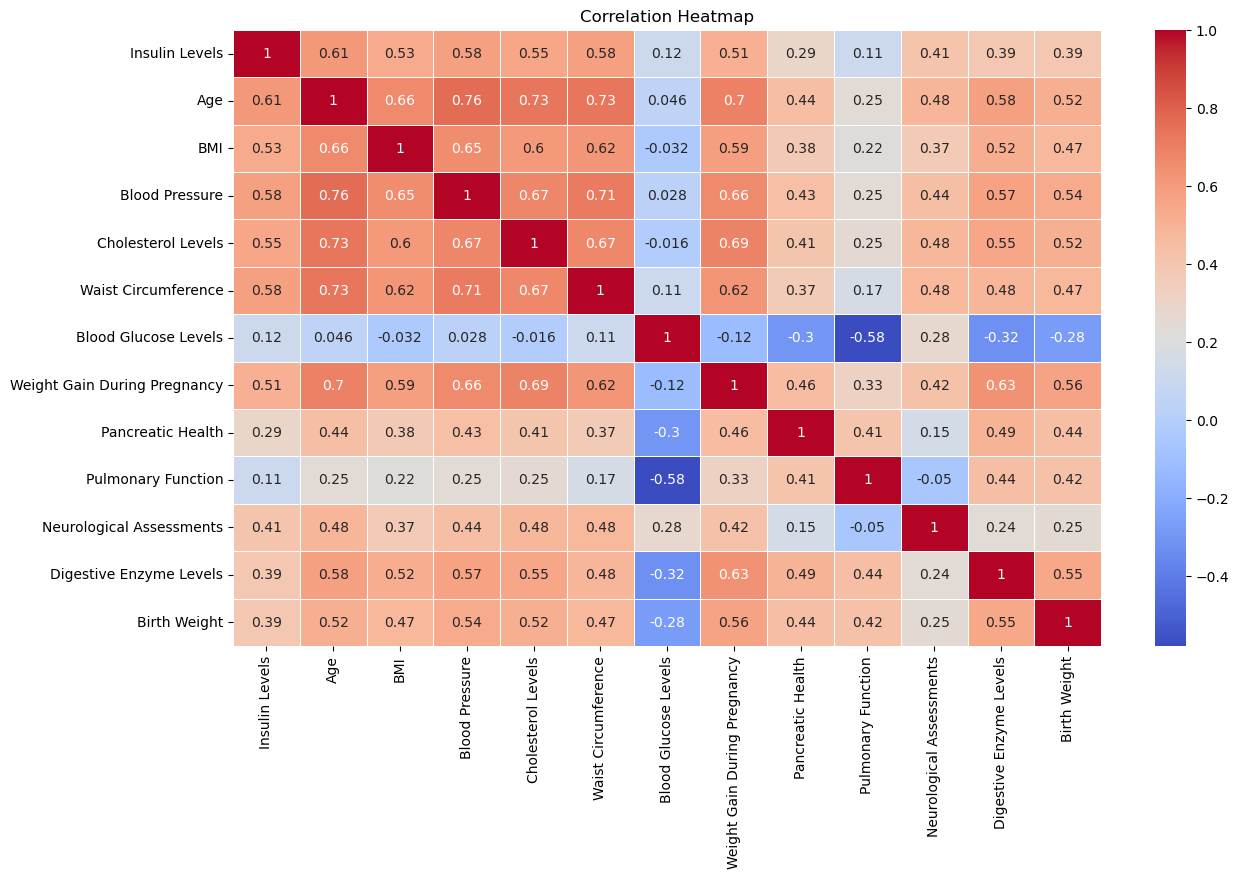

In [13]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(14, 8))  # Enlarging just the heatmap
sns.heatmap(diab.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

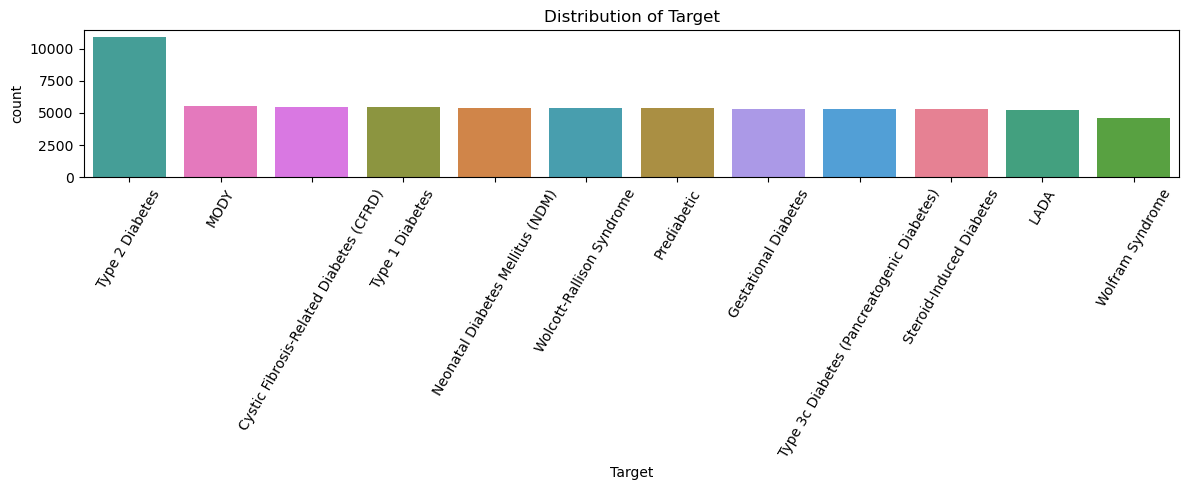

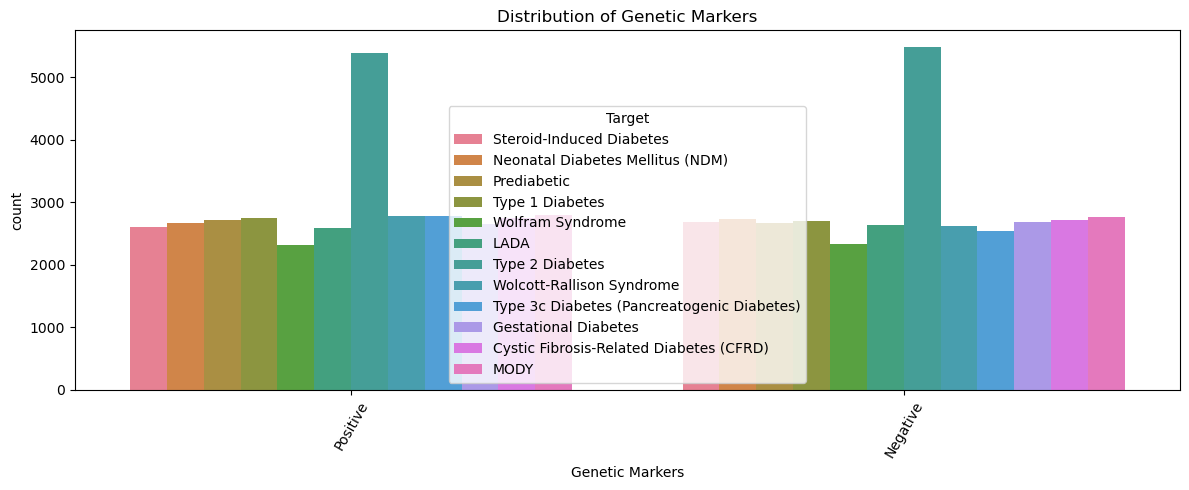

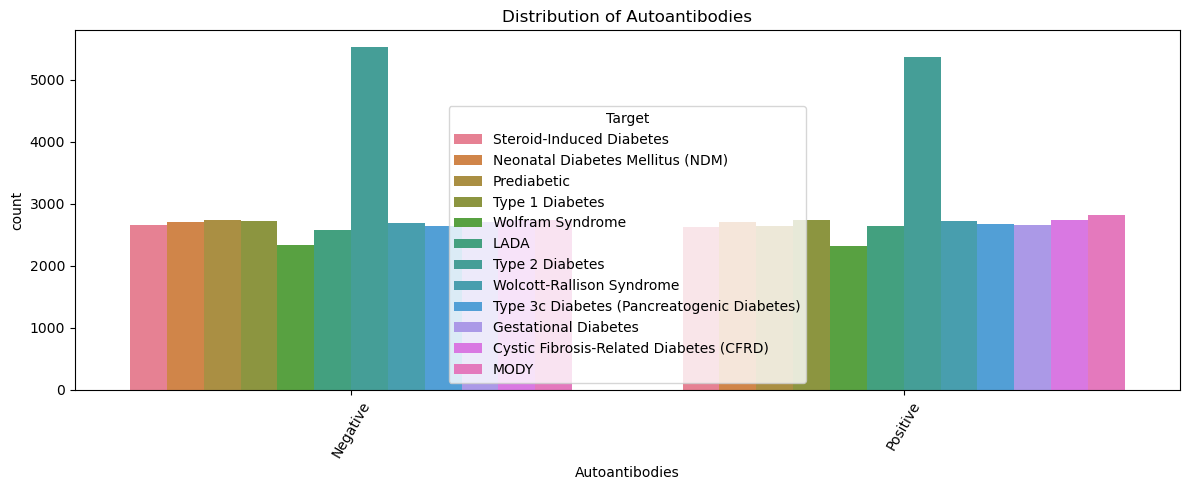

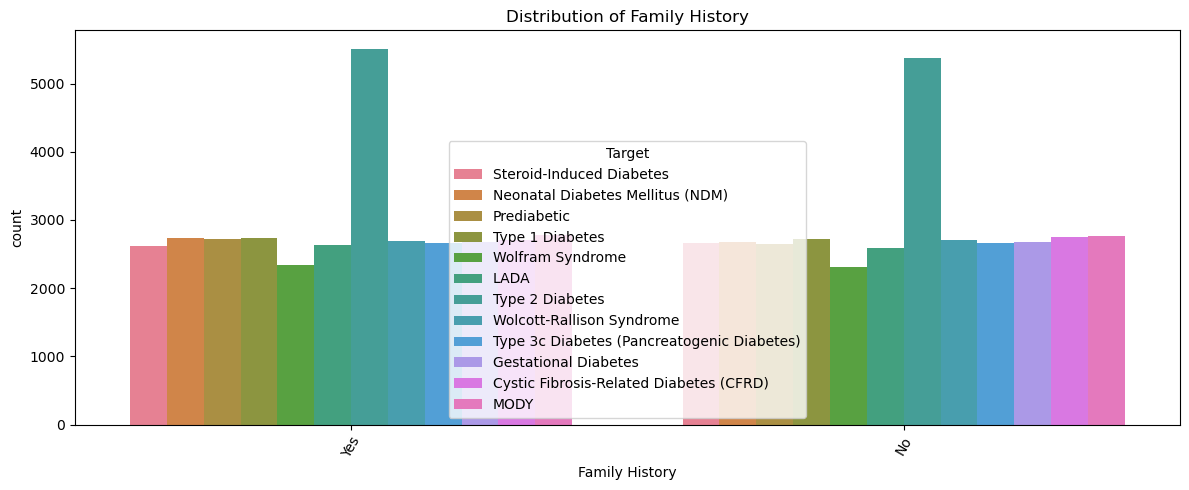

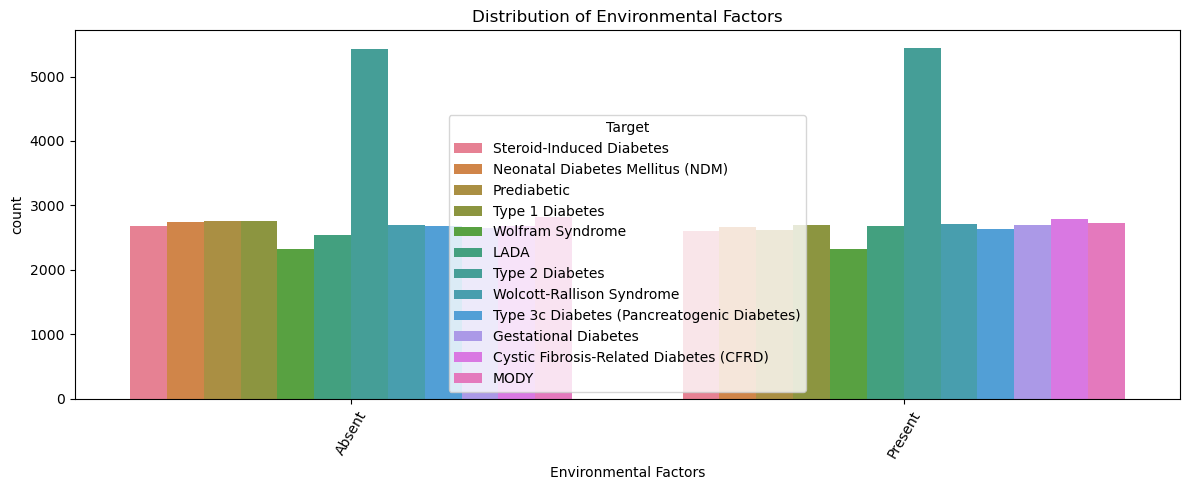

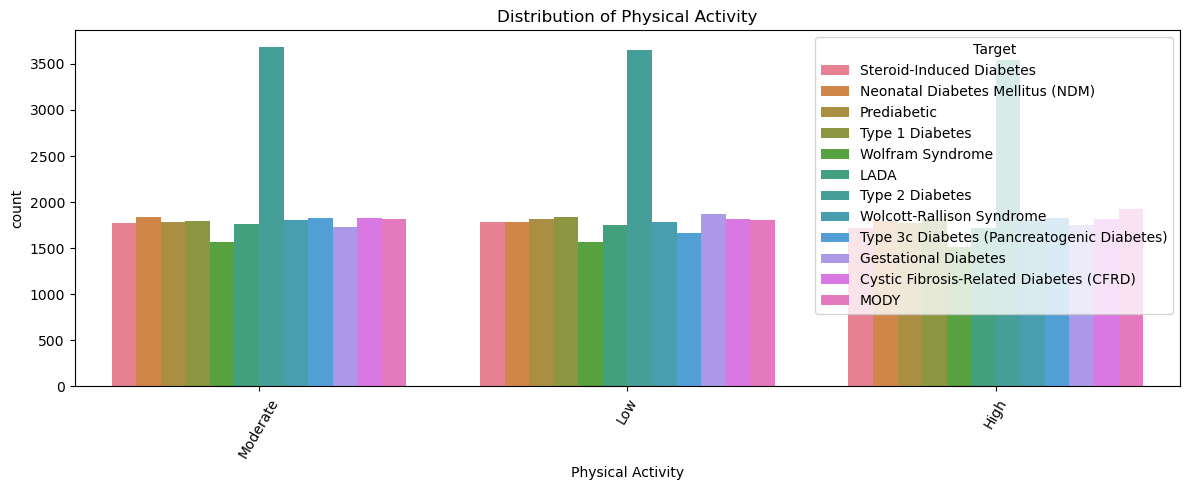

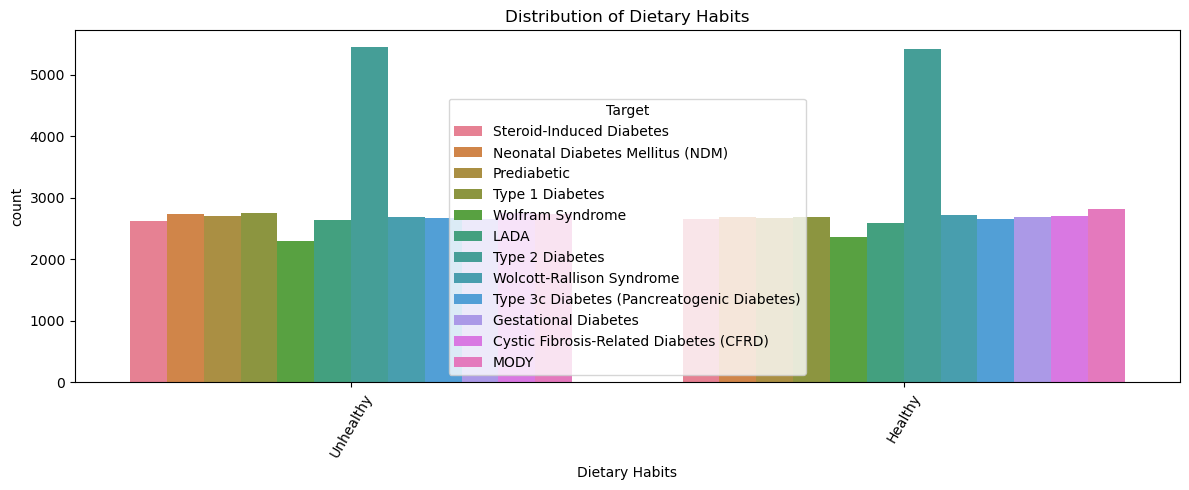

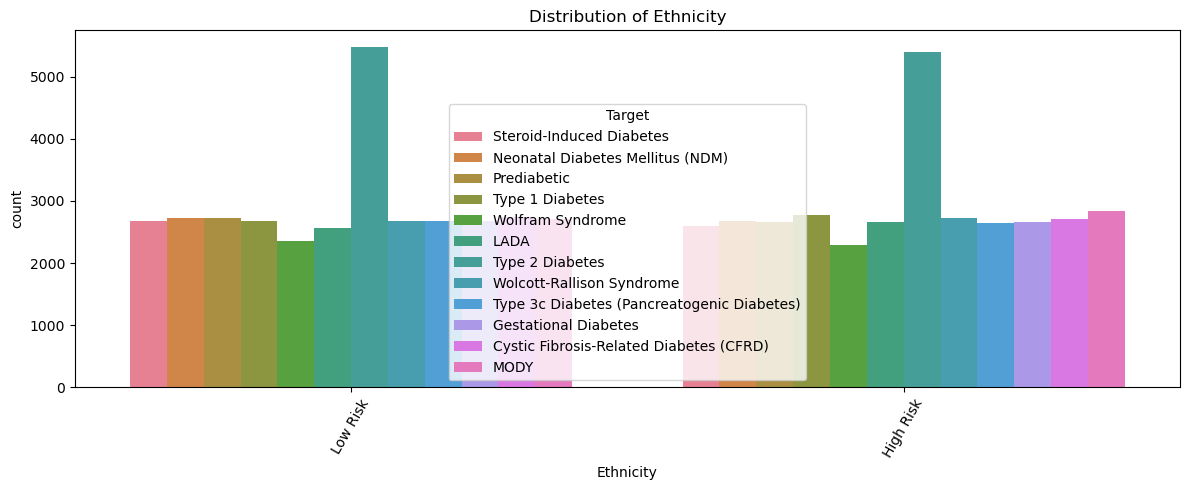

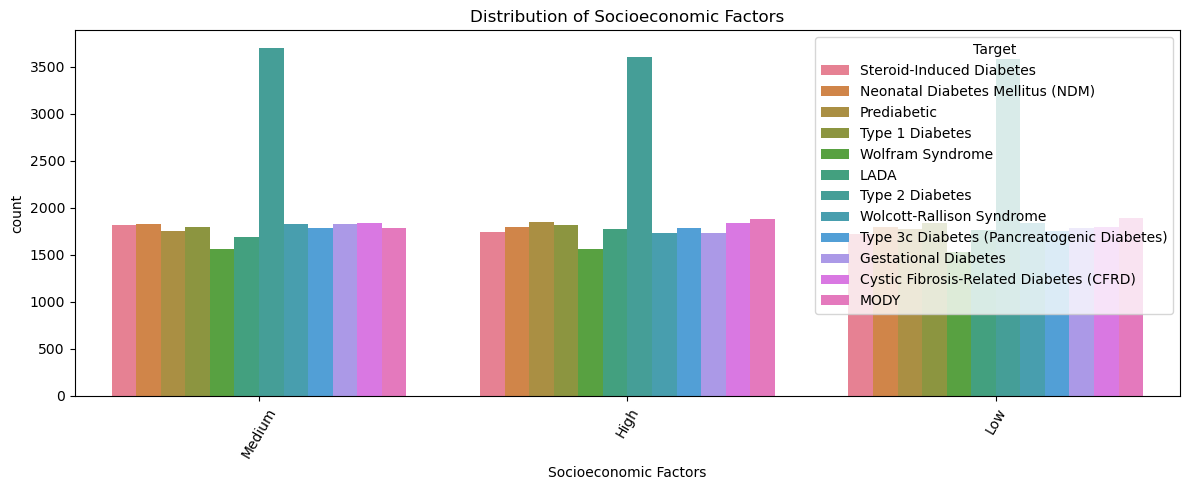

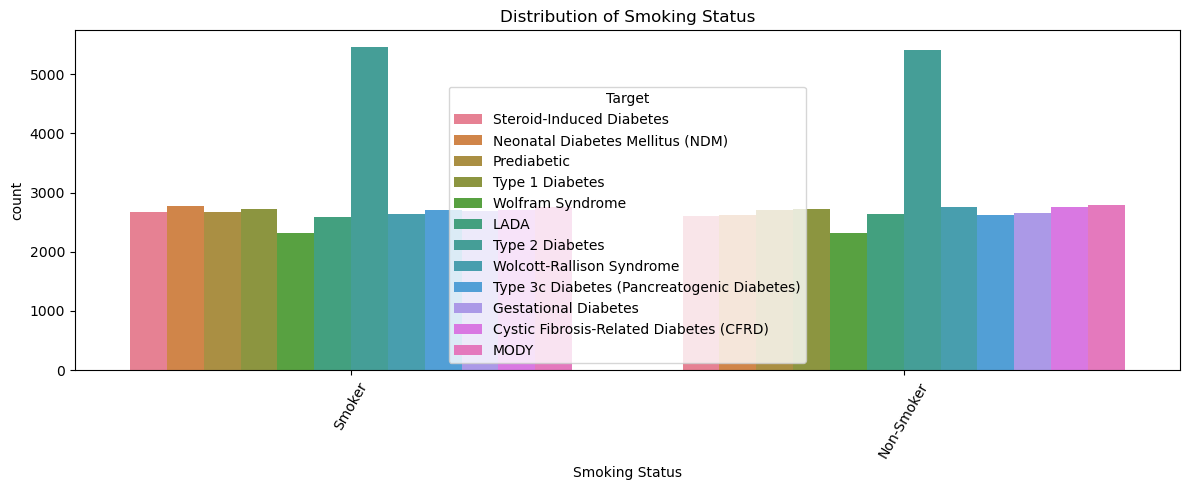

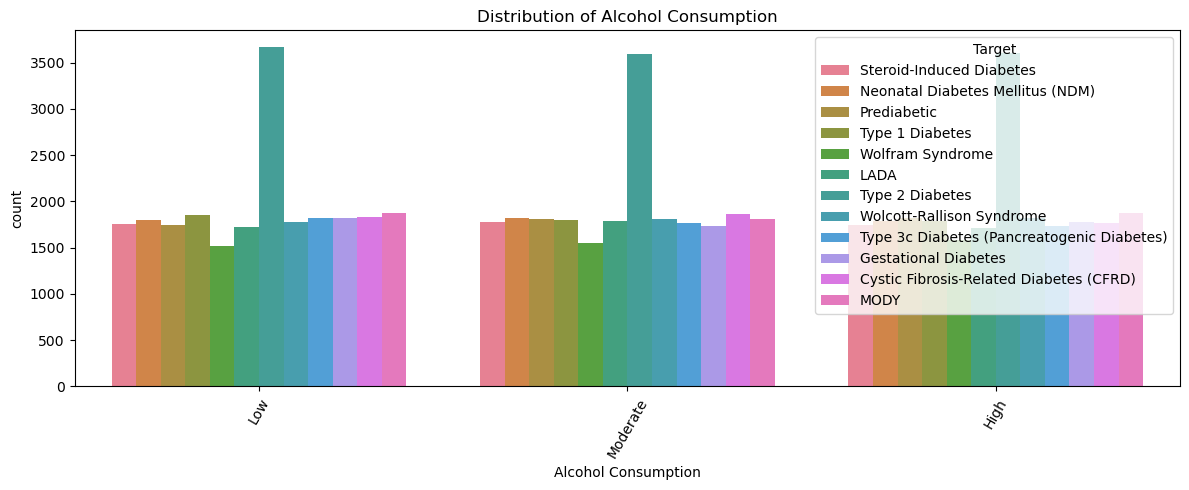

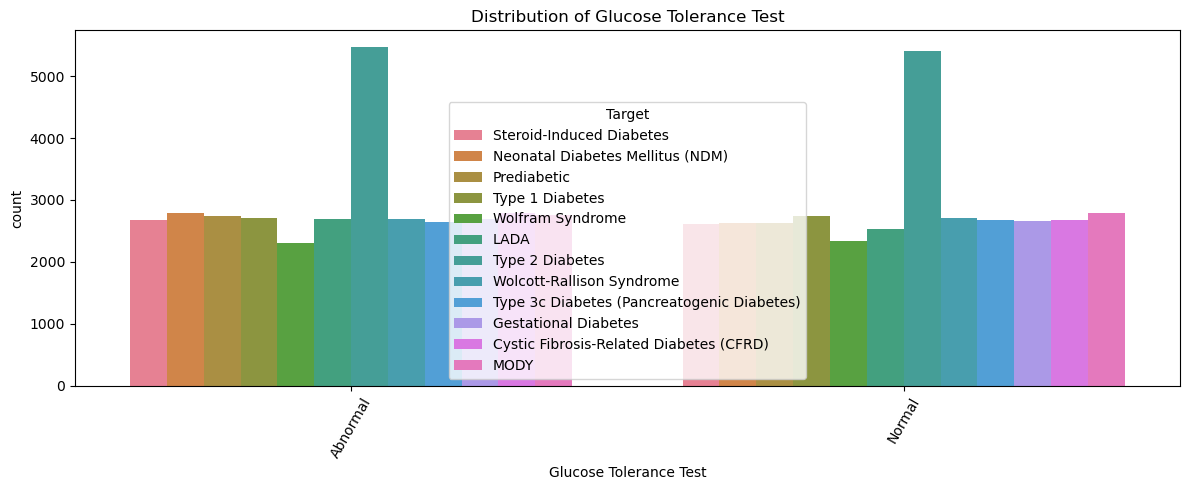

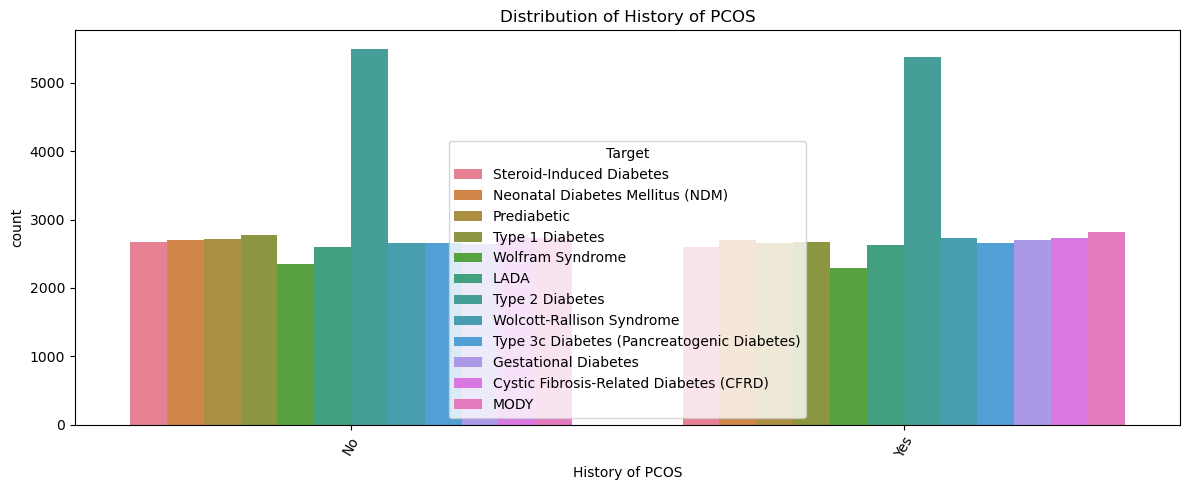

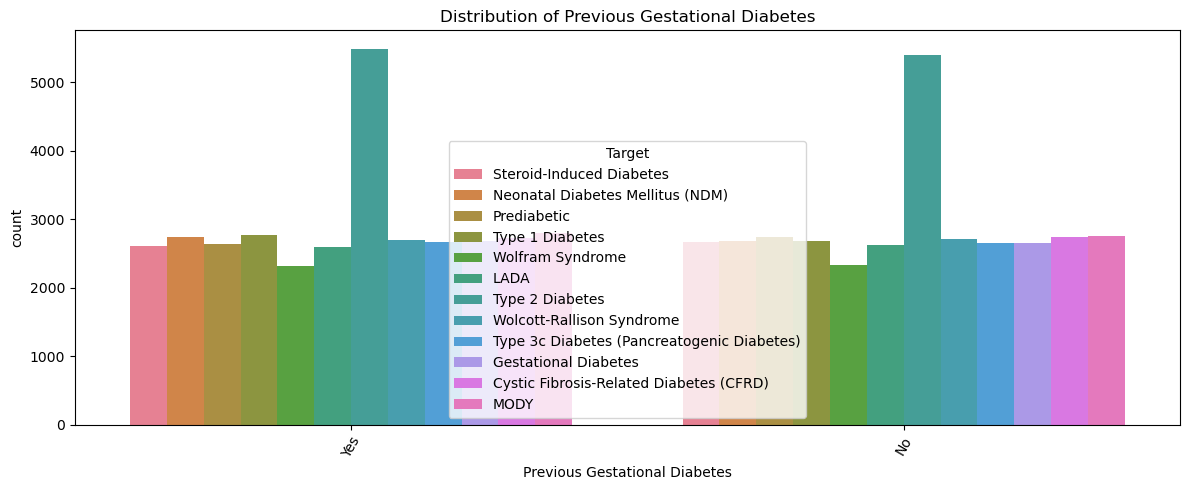

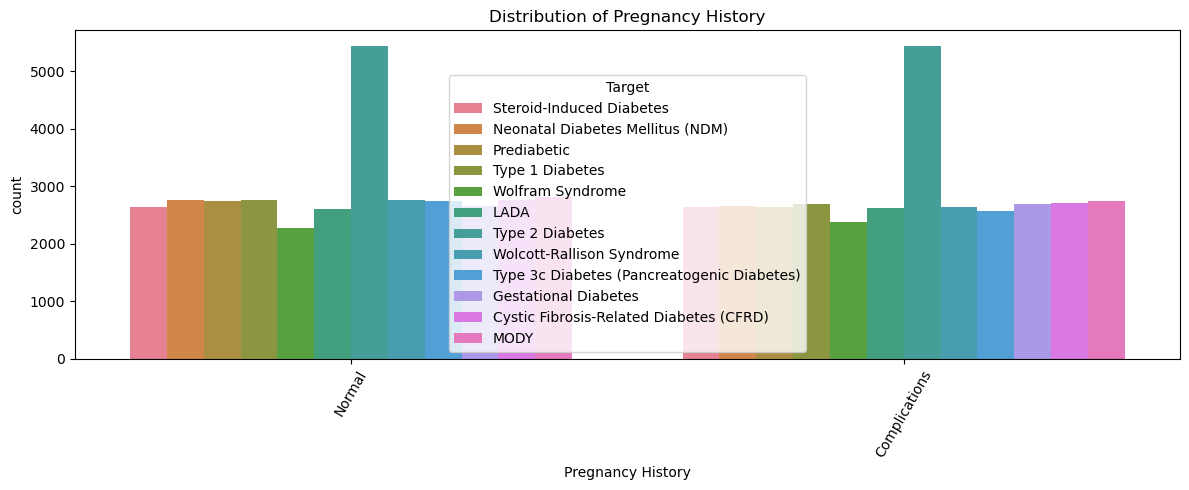

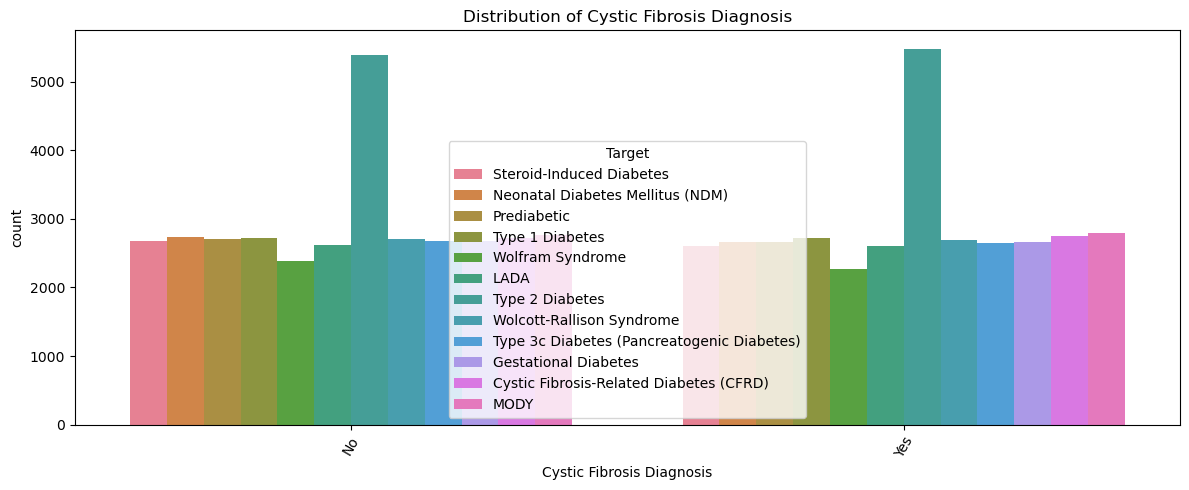

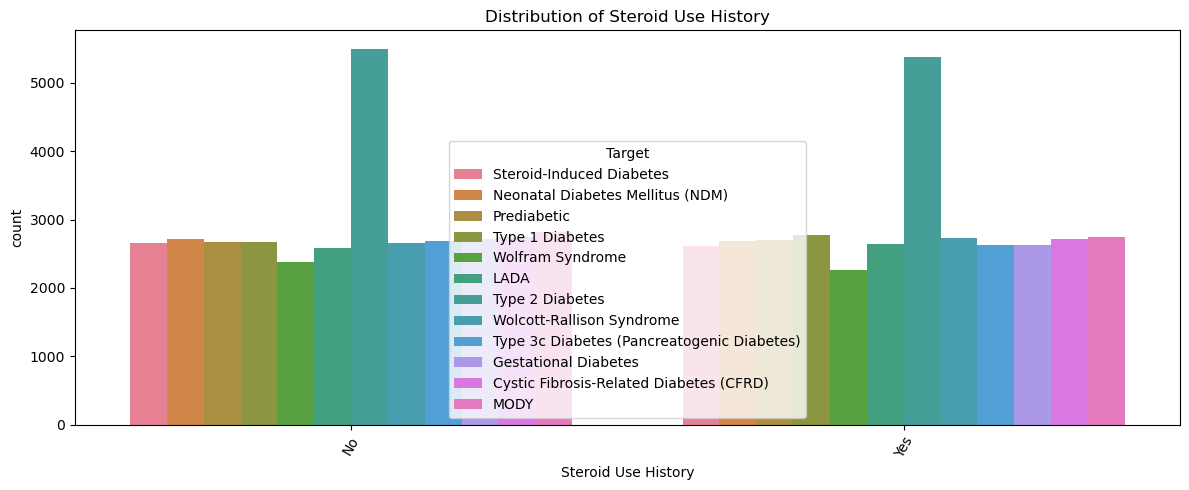

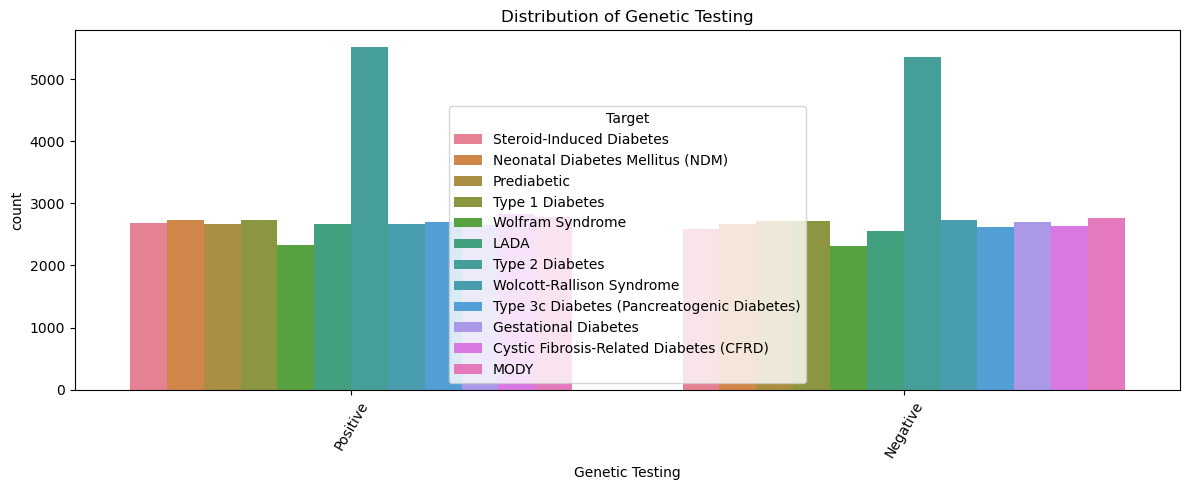

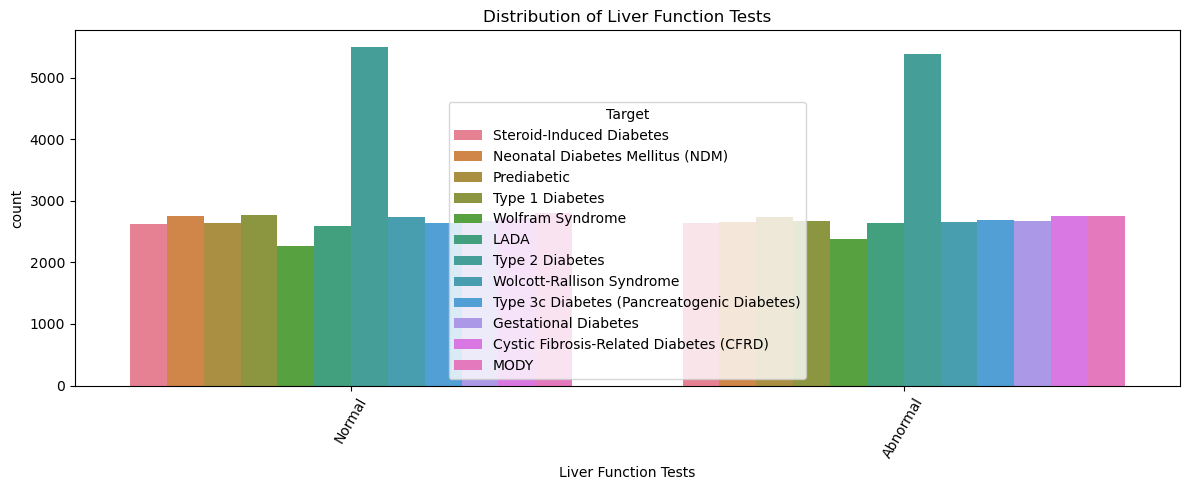

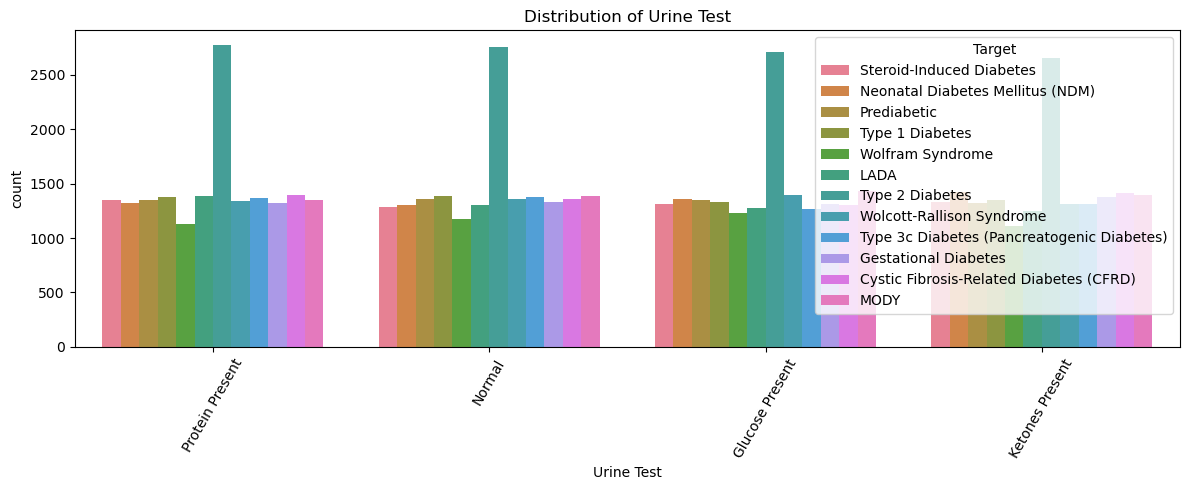

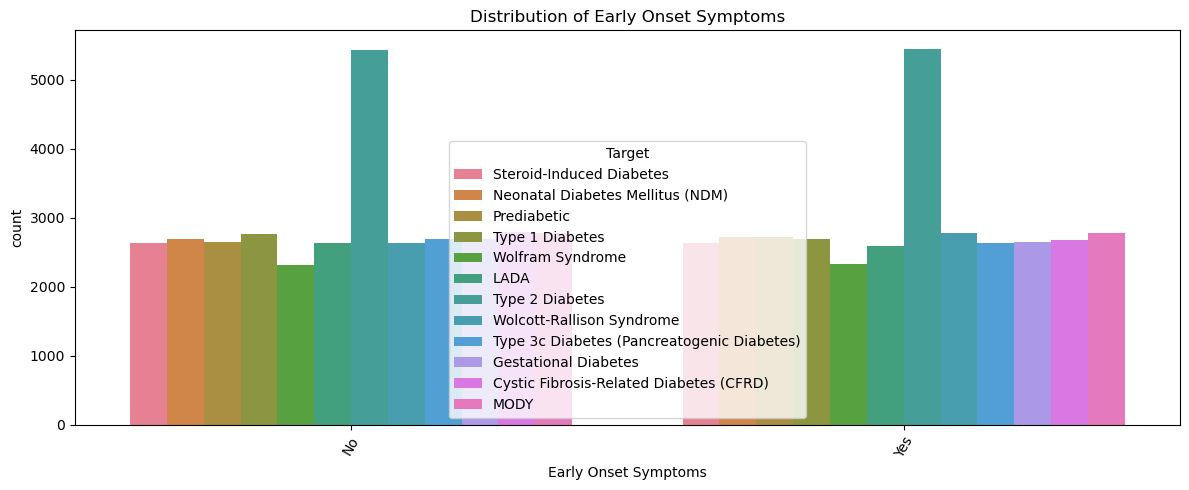

In [14]:
# Plot each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=diab, hue='Target', x=col, order=diab[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()


# Modeling Phase and Evaluation

In [15]:
# Selecting features (X) and target variable (y)
X = diab.drop(columns=["Target"])  # Drop target and non-useful columns
y = diab["Target"]

In [16]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [17]:
# Define preprocessing (scaling & encoding)
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),  
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  
])

In [18]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [19]:
# Preprocess and transform entire dataset
X_processed = preprocessor.fit_transform(X)

In [20]:
# Apply RFE once using Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=20)
X_selected = rfe_selector.fit_transform(X_processed, y_encoded)


In [21]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (Linear Kernel)': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [22]:
# Evaluate models
results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    acc_scores = []
    f1_scores = []

    for train_idx, test_idx in cv.split(X_selected, y_encoded):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, preds))
        f1_scores.append(f1_score(y_test, preds, average='weighted'))

    results.append({
        "Model": name,
        "Mean Accuracy": np.mean(acc_scores),
        "Mean F1-Score": np.mean(f1_scores)
    })

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

In [23]:
# Results summary
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Mean Accuracy  Mean F1-Score
0  Logistic Regression       0.777231       0.775513
1  SVM (Linear Kernel)       0.782453       0.781052
2        Decision Tree       0.884628       0.884587
3        Random Forest       0.919027       0.919098
4             AdaBoost       0.312756       0.185152


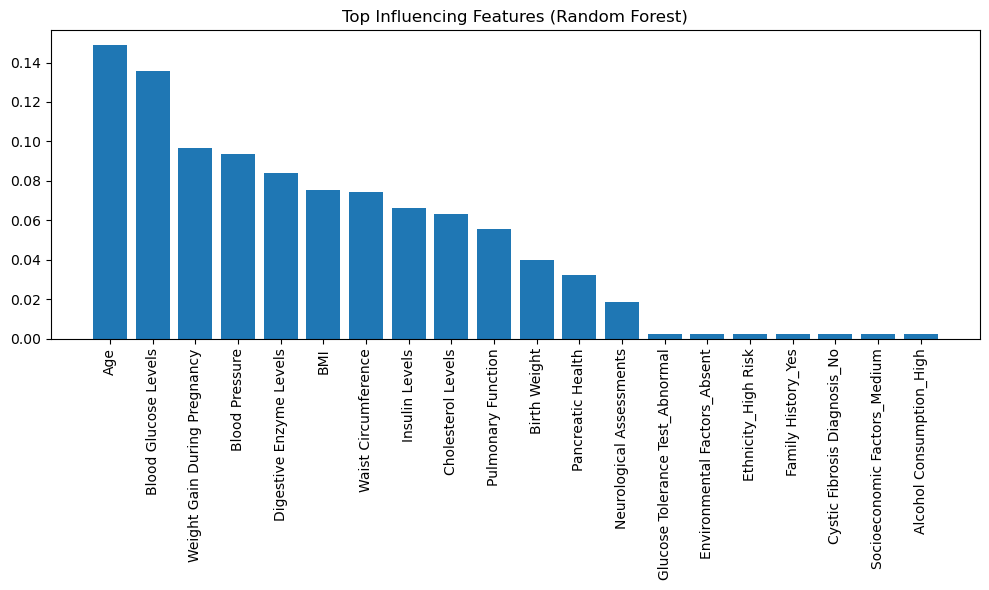

In [24]:
# Feature Importance (Random Forest / Decision Tree)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 1. Recreate preprocessing
X = diab.drop(columns=["Target"])
y = diab["Target"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

# 2. Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Preprocess features
X_preprocessed = preprocessor.fit_transform(X)

# 4. Get feature names
cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_feature_names])

# 5. selecting top k for consistency 
selector = SelectKBest(mutual_info_classif, k=20)
X_selected = selector.fit_transform(X_preprocessed, y_encoded)
selected_feature_names = feature_names[selector.get_support()]

# 6. Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_selected, y_encoded)

# 7. Plot top features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top Influencing Features (Random Forest)")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), selected_feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


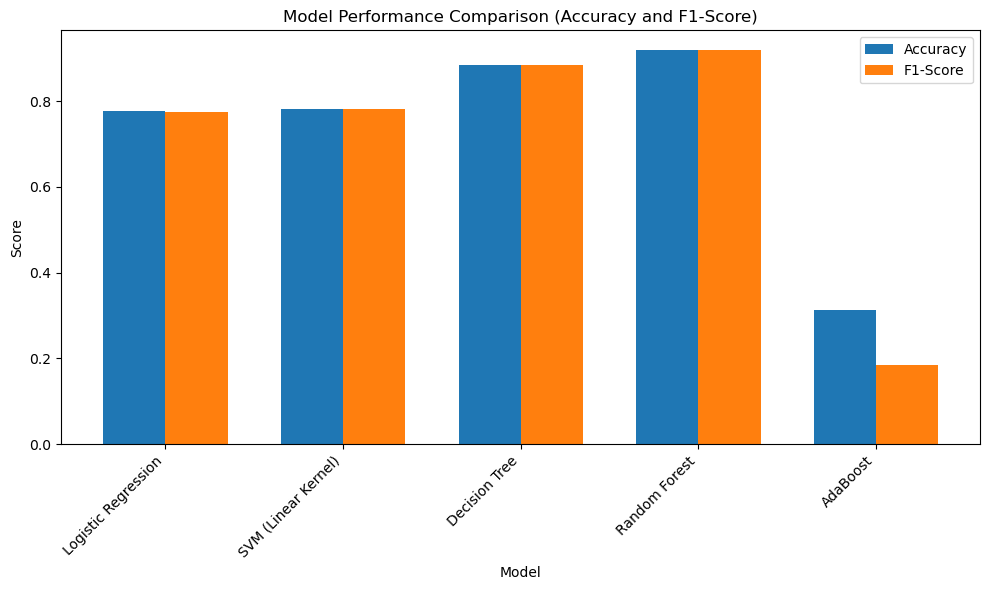

In [28]:
# Model performance data
results = {
    'Model': ['Logistic Regression', 'SVM (Linear Kernel)', 'Decision Tree', 'Random Forest', 'AdaBoost'],
    'Mean Accuracy': [0.7772, 0.7825, 0.8846, 0.9190, 0.3128],
    'Mean F1-Score': [0.7755, 0.7811, 0.8846, 0.9191, 0.1852]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Set up plot
x = np.arange(len(results_df['Model']))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, results_df['Mean Accuracy'], width, label='Accuracy')
bars2 = ax.bar(x + width/2, results_df['Mean F1-Score'], width, label='F1-Score')

# Labels and title
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Model Performance Comparison (Accuracy and F1-Score)')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

# Display
plt.tight_layout()
plt.show()